# Principles of Data Visualization

_Authors:_ Noelle Brown (mostly), Tim Book

---

## Learning Objectives
- Identify what type of visualization may be appropriate for a given scenario.
- Generate bar graphs, histograms, scatter plots, and line plots in `matplotlib` and `seaborn`.
- Generate heat maps in `seaborn`.
- Critique data visualizations and implement changes.

<details><summary>Let's get started with a question: what is the point of creating a visualization for data?</summary>
    
- "Use a picture. It's worth a thousand words." - Tess Flanders, 1911
- We generally use visualizations in order to efficiently and/or effectively communicate information.
</details>

## First, what *not* to do...

<img src="./images/bad1.jpg" style="height: 500px">

<details><summary>What is wrong with the above visualization?</summary>
    
- The y-axis is flipped - most people expect 0 to be at the bottom of the graph, providing a misleading graph for people who just glance at the visualization.
</details>

<img src="./images/bad2.jpg" style="height: 400px">

*Above images from [this source](https://teachdatascience.com/ethicaldataviz/).*

<details><summary>What is wrong with the above visualization?</summary>
    
- The x-axis is not arranged according to dates, but according to cases. This shows a misleading decline in cases that does not actually exist.
</details>

<img src="./images/bad3.png" style="height: 350px">

*Above image from [this source](https://www.datarevelations.com/resources/hey-your-tableau-public-viz-sucks-revisited/).*

<details><summary>What is wrong with the above visualization?</summary>
    
- In general, this graph is not super clear. The reader is unsure of what is being conveyed here.
- The main problem with this visual is the color scale! As a general rule, never use red and green together in a visualization. Stick with accessible, color blind friendly color palettes. Read more about this [here](https://venngage.com/blog/color-blind-friendly-palette/).
</details>

You can see more bad visualizations [here](https://viz.wtf/)!

## What to do...

1. Less is more. Get rid of everything you don’t need and only focus on what you are trying to communicate.
> “Above all else show the data.” “Graphical excellence consists of complex ideas communicated with clarity, precision, and efficiency.”  
> - Tufte in [Visual Display of Quantitative Information](https://www.amazon.com/Visual-Display-Quantitative-Information/dp/1930824130)
2. Use color to help communicate
> Color should be used to emphasize, not distract the audience. We can use color to draw the audience's eyes where we want them to look. If you are concerned that your image is too "cluttered," then consider toning down your use of color.
3. Design for Accessibility
> Color Blindness/ Color Vision Deficiency (CVD) can take many forms. Red-green is 99% of cases.  
> - "Red–green color blindness is the most common form, followed by blue–yellow color blindness and total color blindness. Red–green color blindness affects up to 8% of males and 0.5% of females of Northern European descent." - [Wikipedia](https://en.wikipedia.org/wiki/Color_blindness)

### Let's do it!

First, let's download our data. This data is from [Kaggle](https://www.kaggle.com/crawford/80-cereals?select=cereal.csv) and is part of a [Makeover Monday challenge](https://www.makeovermonday.co.uk/data/) to improve a visualization.

<img src="./images/cereal.jpeg" style="height: 35==200px">

In [2]:
!pip install matplotlib


In [2]:
# Imports
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [8]:
# Import and view cereal data
cereal = pd.read_csv(r'data\cereal.csv')
print(cereal.columns)
print(cereal.shape)
cereal.head()



Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')
(77, 16)


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [13]:
print(cereal.groupby('mfr').size())
cereal.describe(include='all').round(1)

mfr
A     1
G    22
K    23
N     6
P     9
Q     8
R     8
dtype: int64


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77,77,77,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0
unique,77,7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,100% Bran,K,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,23,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,106.9,2.5,1.0,159.7,2.2,14.6,6.9,96.1,28.2,2.2,1.0,0.8,42.7
std,NaN,NaN,NaN,19.5,1.1,1.0,83.8,2.4,4.3,4.4,71.3,22.3,0.8,0.2,0.2,14.0
min,NaN,NaN,NaN,50.0,1.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,1.0,0.5,0.2,18.0
25%,NaN,NaN,NaN,100.0,2.0,0.0,130.0,1.0,12.0,3.0,40.0,25.0,1.0,1.0,0.7,33.2
50%,NaN,NaN,NaN,110.0,3.0,1.0,180.0,2.0,14.0,7.0,90.0,25.0,2.0,1.0,0.8,40.4
75%,NaN,NaN,NaN,110.0,3.0,2.0,210.0,3.0,17.0,11.0,120.0,25.0,3.0,1.0,1.0,50.8


In [17]:
cereal['sug_per_cup'] =  cereal['sugars'] / cereal['cups']

## Bar Charts

> "A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent." -[Wikipedia](https://en.wikipedia.org/wiki/Bar_chart)

In [27]:
# Get top 10 most sugary cereals, save as a variable

sugary = cereal.sort_values('sugars', ascending=False)[:10]

spc = cereal.sort_values('sug_per_cup', ascending=False)[:10]

display(sugary)
display(spc)

overlap = sugary.merge(spc, on= 'name', how='inner')
overlap.shape

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,sug_per_cup
66,Smacks,K,C,110,2,1,70,1.0,9.0,15,40,25,2,1.00,0.75,31.230054,20.000000
30,Golden Crisp,P,C,100,2,0,45,0.0,11.0,15,40,25,1,1.00,0.88,35.252444,17.045455
70,Total Raisin Bran,G,C,140,3,1,190,4.0,15.0,14,230,100,3,1.50,1.00,28.592785,14.000000
52,Post Nat. Raisin Bran,P,C,120,3,1,200,6.0,11.0,14,260,25,3,1.33,0.67,37.840594,20.895522
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094,14.000000
46,Mueslix Crispy Blend,K,C,160,3,2,150,3.0,17.0,13,160,25,3,1.50,0.67,30.313351,19.402985
18,Count Chocula,G,C,110,1,1,180,0.0,12.0,13,65,25,2,1.00,1.00,22.396513,13.000000
24,Froot Loops,K,C,110,2,1,125,1.0,11.0,13,30,25,2,1.00,1.00,32.207582,13.000000
14,Cocoa Puffs,G,C,110,1,1,180,0.0,12.0,13,55,25,2,1.00,1.00,22.736446,13.000000
28,Fruitful Bran,K,C,120,3,0,240,5.0,14.0,12,190,25,3,1.33,0.67,41.015492,17.910448


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,sug_per_cup
52,Post Nat. Raisin Bran,P,C,120,3,1,200,6.0,11.0,14,260,25,3,1.33,0.67,37.840594,20.895522
66,Smacks,K,C,110,2,1,70,1.0,9.0,15,40,25,2,1.00,0.75,31.230054,20.000000
51,Oatmeal Raisin Crisp,G,C,130,3,2,170,1.5,13.5,10,120,25,3,1.25,0.50,30.450843,20.000000
46,Mueslix Crispy Blend,K,C,160,3,2,150,3.0,17.0,13,160,25,3,1.50,0.67,30.313351,19.402985
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973,18.181818
28,Fruitful Bran,K,C,120,3,0,240,5.0,14.0,12,190,25,3,1.33,0.67,41.015492,17.910448
30,Golden Crisp,P,C,100,2,0,45,0.0,11.0,15,40,25,1,1.00,0.88,35.252444,17.045455
29,Fruity Pebbles,P,C,110,1,1,135,0.0,13.0,12,25,25,2,1.00,0.75,28.025765,16.000000
59,Raisin Nut Bran,G,C,100,3,2,140,2.5,10.5,8,140,25,3,1.00,0.50,39.703400,16.000000
10,Cap'n'Crunch,Q,C,120,1,2,220,0.0,12.0,12,35,25,2,1.00,0.75,18.042851,16.000000


(5, 33)

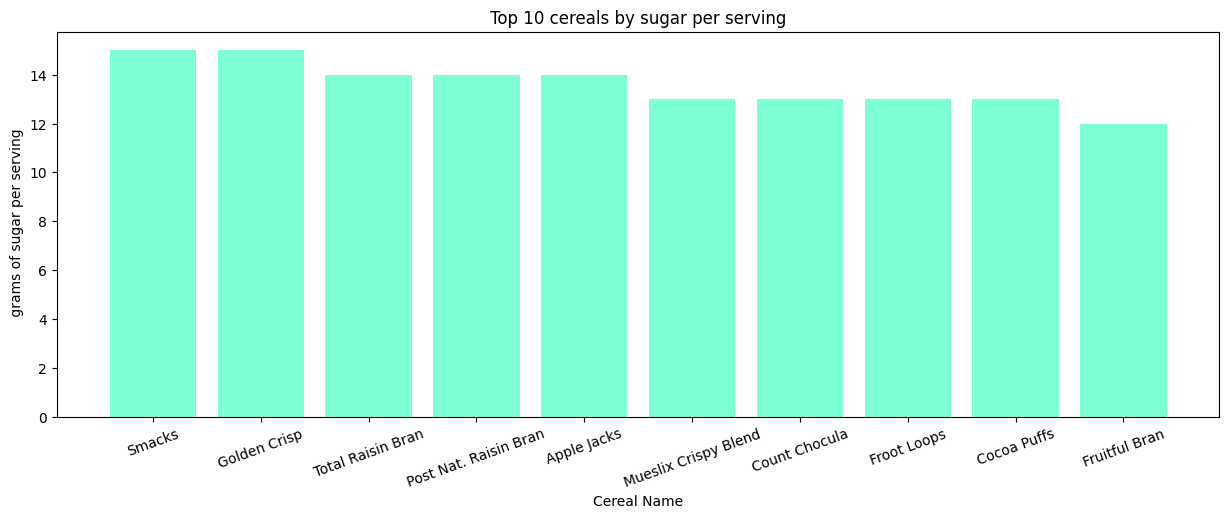

In [39]:
# MATPLOTLIB - Plot Bar Chart

# setting size
plt.figure(figsize = (15, 5))  # nums in inches

#barchart args:  x axis,  then y-axis
plt.bar(sugary['name'], sugary['sugars'], color = 'aquamarine')  #semicolon (at the very end of the plt series) gets rid of object message

plt.title('Top 10 cereals by sugar per serving')

plt.xticks(rotation=20)

plt.xlabel('Cereal Name')
plt.ylabel(' grams of sugar per serving');

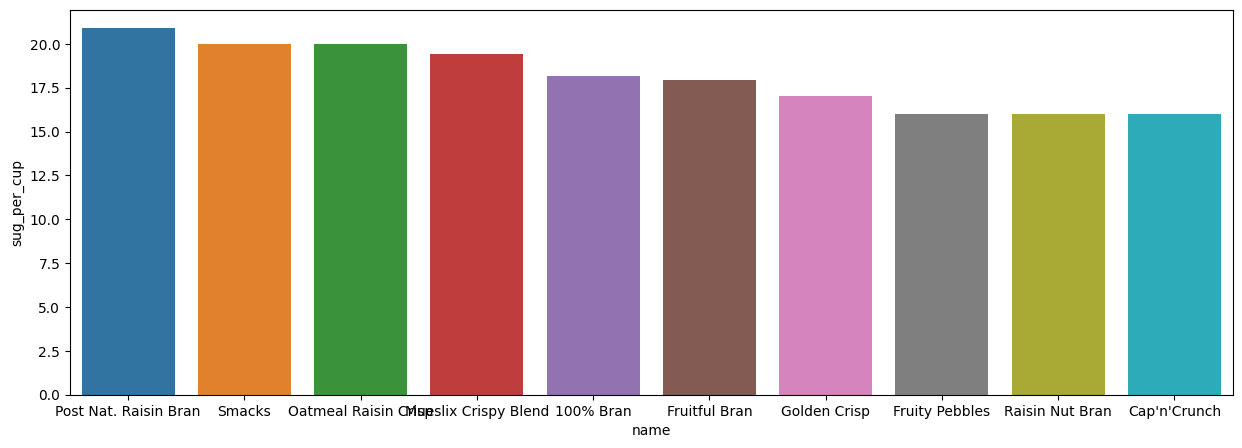

In [44]:
# SEABORN - Plot Bar Chart

plt.figure(figsize = (15,5))

sns.barplot(x = spc['name'], y = spc['sug_per_cup'], hue = spc['name'], legend=False);

# go back to mat plot lib format for labels and titles


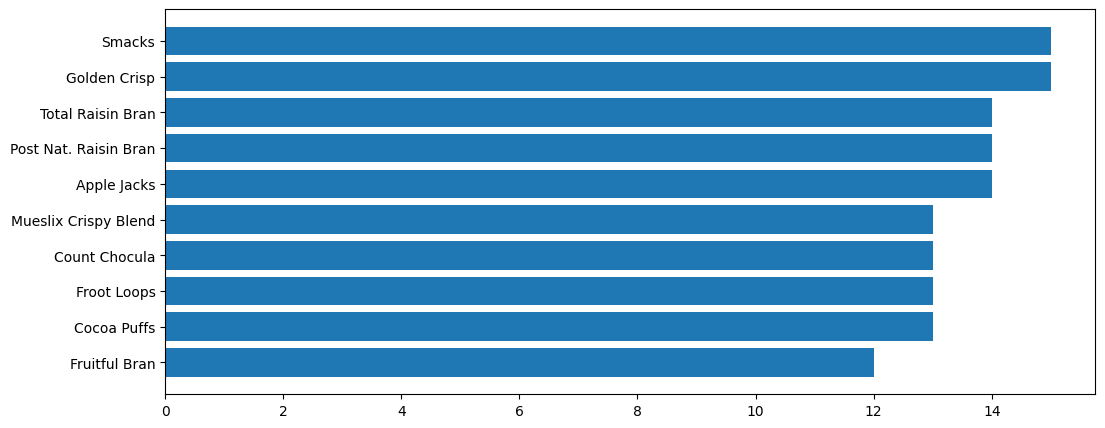

In [49]:
# MATPLOTLIB - Plot Horizontal Bar Chart
#plt.barh() will create a horizontal bar chart. (Note the h at the end of bar!)

# Size
plt.figure(figsize=(12,5))


# plt.barh()
plt.barh(sugary['name'][::-1], sugary['sugars'][::-1]); # need both negative slices to have data properly diplayed in descending order

# Create a descriptive title

# Add axis labels


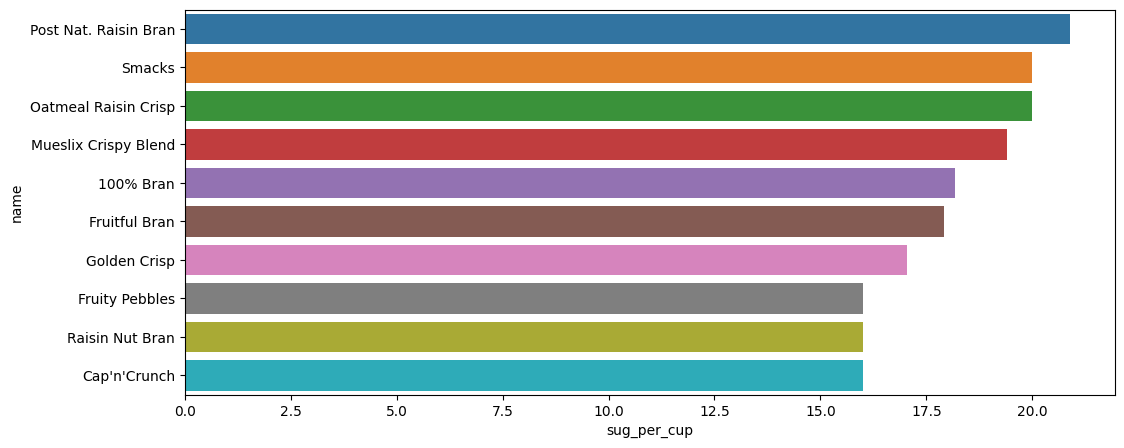

In [53]:
# SEABORN - Plot Horizontal Bar Chart
plt.figure(figsize=(12,5))

sns.barplot(orient='h', y=spc['name'], x = spc['sug_per_cup'],hue = spc['name'], legend=False);

## Histograms
> Histograms are used to display the distribution of numerical data.

Text(0.5, 1.0, 'distribution of consumer report ratings')

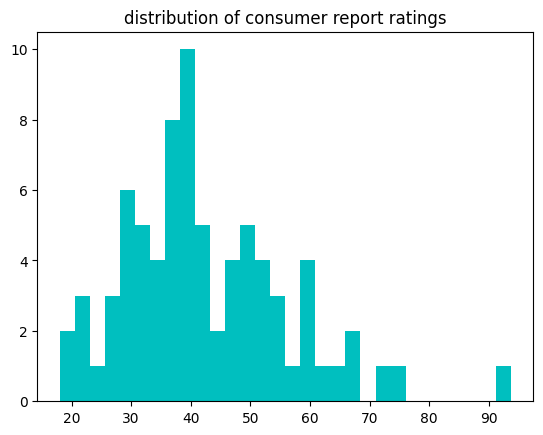

In [58]:
# MATPLOTLIB - Plot a histogram of cereal rating

plt.hist(cereal['rating'], color = 'c', bins = 30)
# leaving off the semicolon shows breakpoints

# Plot it

# Create a descriptive title

plt.title('distribution of consumer report ratings')


<Axes: xlabel='rating', ylabel='Count'>

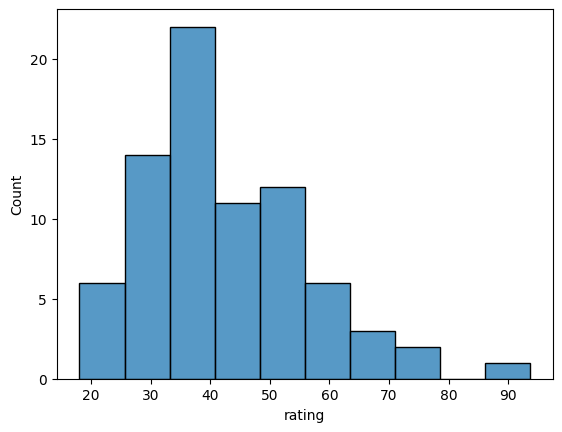

In [68]:
# SEABORN - Plot a histogram of cereal rating

sns.histplot(cereal['rating'], bins = 'auto')

# bins = 'auto'

# auto labels, but they can be overwritten!

## Boxplots
> Boxplot are used to display the distribution of numerical data.

Text(0.5, 1.0, 'distribution of consumer reports ratings')

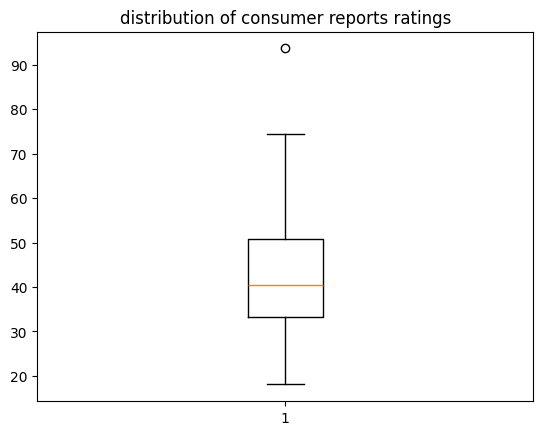

In [70]:
# MATPLOTLIB - Plot a boxplot of cereal rating

# Plot it
plt.boxplot(cereal['rating'])


# Create a descriptive title
plt.title('distribution of consumer reports ratings')

# O denotes outlier

Text(0.5, 1.0, 'distribution of consumer reports ratings')

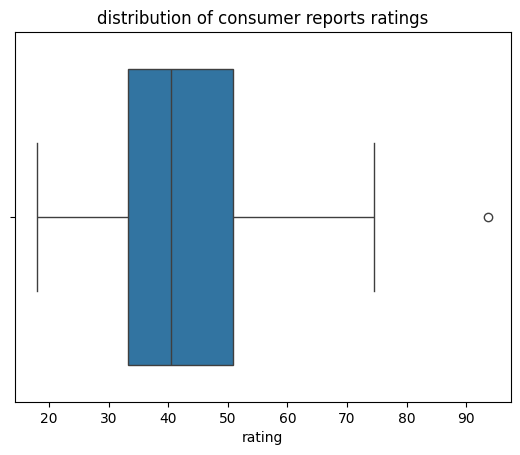

In [72]:
# SEABORN - Plot a boxplot of cereal rating
sns.boxplot(x = cereal['rating'])

plt.title('distribution of consumer reports ratings')

In [73]:
#BONUS - What cereal has that super high rating?!

cereal[cereal['rating'] >80]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,sug_per_cup
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.5,93.704912,0.0


## Scatter Plots
> Scatter plots are used to display the relationship between two variables.

''

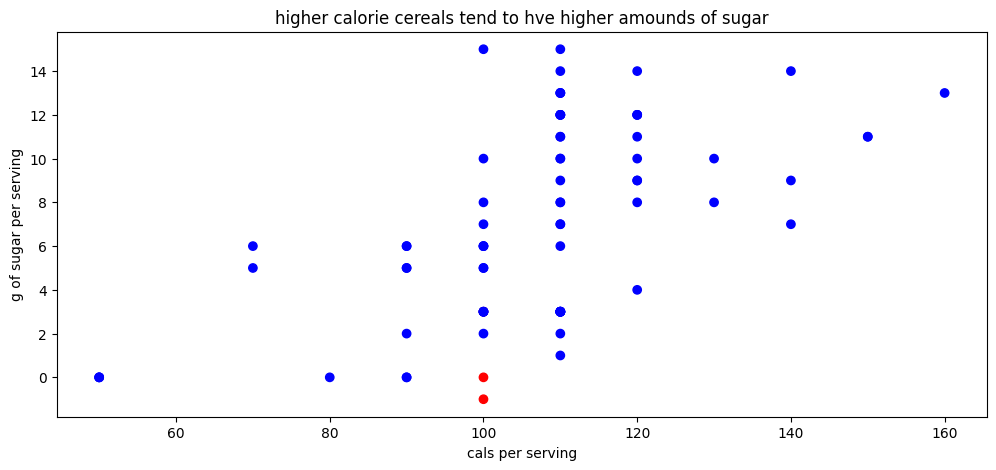

In [79]:
# MATPLOTLIB - Create a scatter plot of calories vs. sugar
    
# Size
plt.figure(figsize=(12,5))

# grouping dict (by type of cereal)
colors = {'C': 'blue', 'H': 'red' }

# Plot it
plt.scatter(x=cereal['calories'], y=cereal['sugars'], color = cereal['type'].map(colors))

# Create a descriptive title
plt.title('higher calorie cereals tend to hve higher amounds of sugar')

# Add axis labels
plt.xlabel('cals per serving')
plt.ylabel('g of sugar per serving')


;


<Axes: xlabel='calories', ylabel='sugars'>

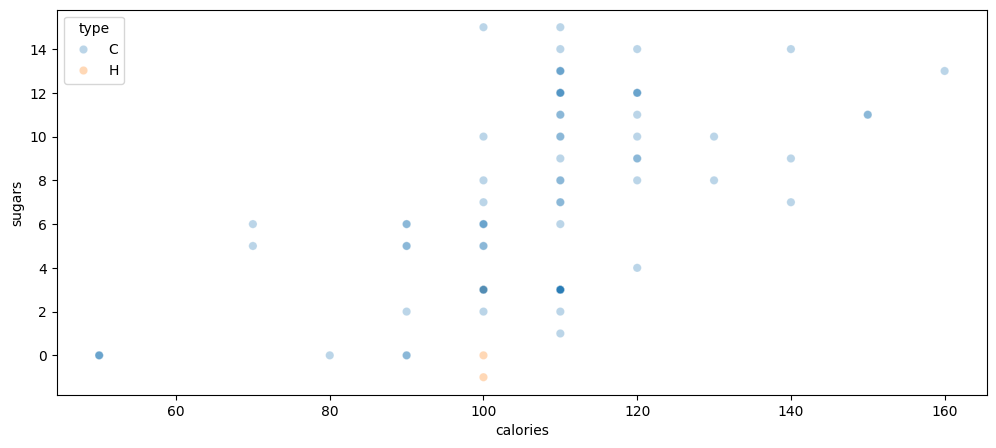

In [86]:
# SEABORN - Create a scatter plot of calories vs. sugar
plt.figure(figsize=(12,5))

sns.scatterplot(x=cereal['calories'], y=cereal['sugars'], hue = cereal['type'], alpha = 0.3)

#alpha changes transparency to show dots stacked on top of each other

## Line Graphs
> Line graphs (also known as line plots or line charts) use lines to connect data points to show the changes in numerical values over time.

In [87]:
# Generate data over time

# Generate dates
dates = pd.date_range('3-1-22', '7-30-22')

In [88]:
# Generate bowls eaten
bowls_eaten = np.random.poisson(1, size = 152)

Text(0.5, 0, 'date')

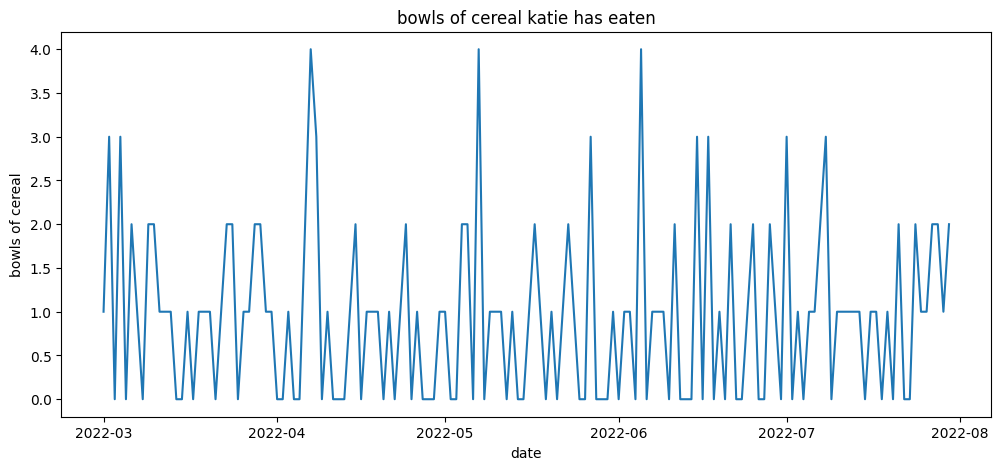

In [90]:
# MATPLOTLIB - Create a line plot of the number of bowls of cereal I've consumed

# Size
plt.figure(figsize=(12,5))

# Plot it 
plt.plot(dates, bowls_eaten)

# Create a descriptive title
plt.title('bowls of cereal katie has eaten')

# Add axis labels
plt.ylabel('bowls of cereal')
plt.xlabel('date')

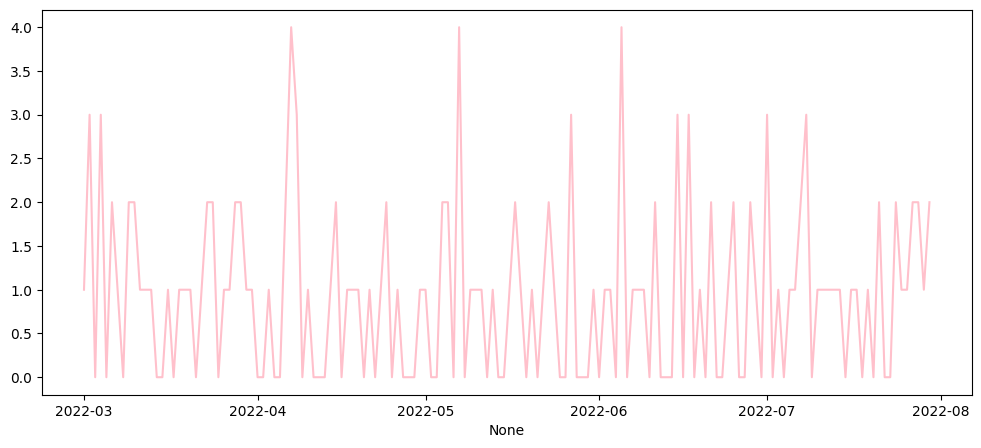

In [92]:
# SEABORN - Create a line plot of the number of bowls of cereal I've consumed

plt.figure(figsize=(12,5))

sns.lineplot(x=dates, y=bowls_eaten, color = 'pink');

## Heat Maps
> Heat maps use color to show the strength of a relationship between two or more variables.

A commonly seen implementation of a heatmap uses the [Seaborn library](https://seaborn.pydata.org).

In [98]:
cereal_relations = cereal.corr(numeric_only=True)

<Axes: >

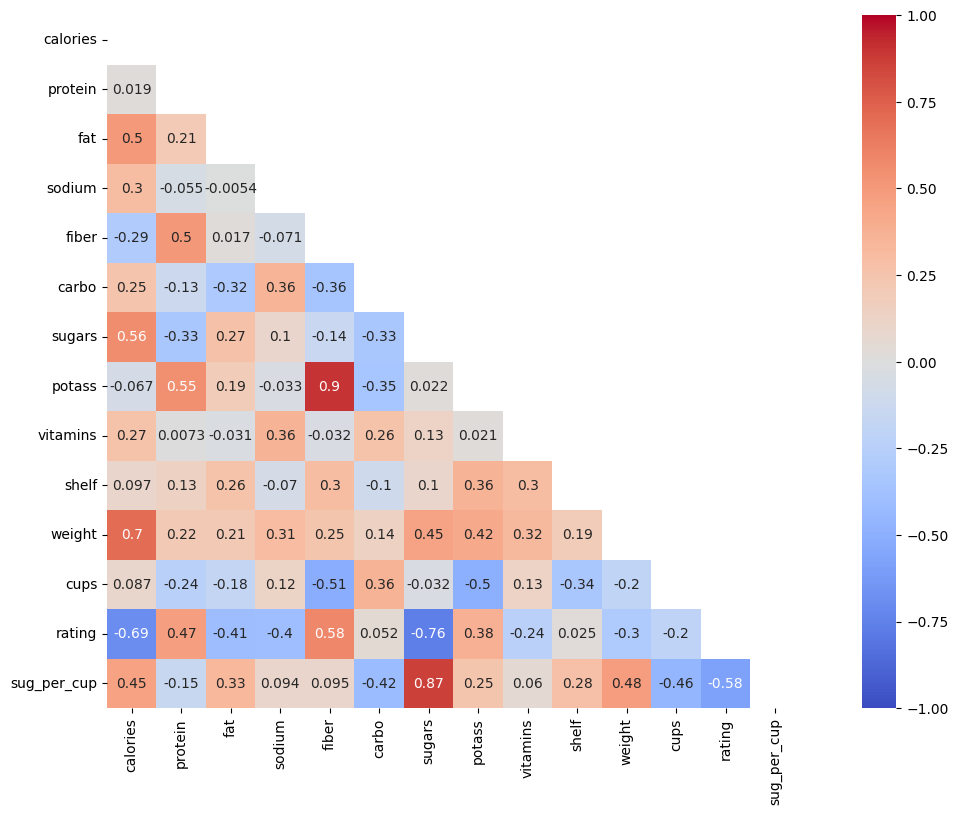

In [105]:
# This code is taken with minor modifications from https://seaborn.pydata.org/generated/seaborn.heatmap.html

# Establish size of figure.
plt.figure(figsize=(16,9))

# Get correlation of variables.
cereal_relations

# Set up mask to be "True" in the upper triangle.

mask = np.zeros_like(cereal_relations)

mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap
sns.heatmap(cereal_relations,
            square=True,
            cmap= 'coolwarm',
            annot=True,
            vmin=-1,
            vmax=1,
            mask = mask)

<Axes: >

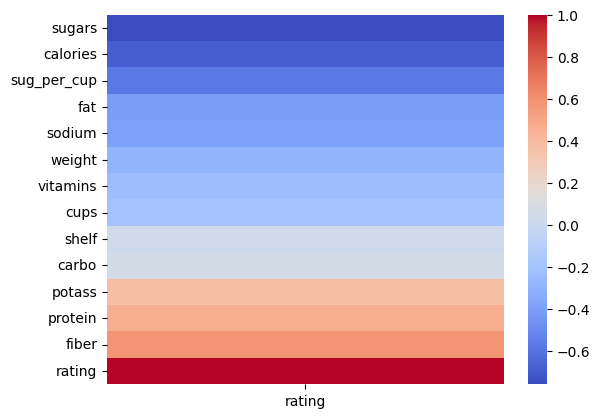

In [113]:
# Let's look at the correlations to rating
sns.heatmap(cereal.corr(numeric_only=True)[['rating']].sort_values('rating'), cmap='coolwarm')

Correlation refers to a statistical relationship between two variables. When two variables are correlated, changes in one variable are associated with changes in the other variable. A correlation can be positive (meaning that the two variables move in the same direction) or negative (meaning that the two variables move in opposite directions). However, correlation does not imply causation.

Correlation can be a useful tool to identify potential relationships between variables, but it is not sufficient to establish causation.

[Spurious Correlations](https://www.tylervigen.com/spurious-correlations)

## Advanced: Subplots
> We can use subplots to easily compare multiple visualizations by sharing an axis.

In [117]:
stocks = pd.read_csv('data/food-stocks.csv')
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks.head().round(3)

,Date,DPZ,MCD,WEN,YUM
0,2020-04-13,355.14,180.12,16.57,77.06
1,2020-04-14,358.26,183.99,17.17,79.89
2,2020-04-15,354.62,177.84,16.74,77.64
3,2020-04-16,360.47,179.50,17.28,80.11
4,2020-04-17,362.97,186.10,18.40,84.17


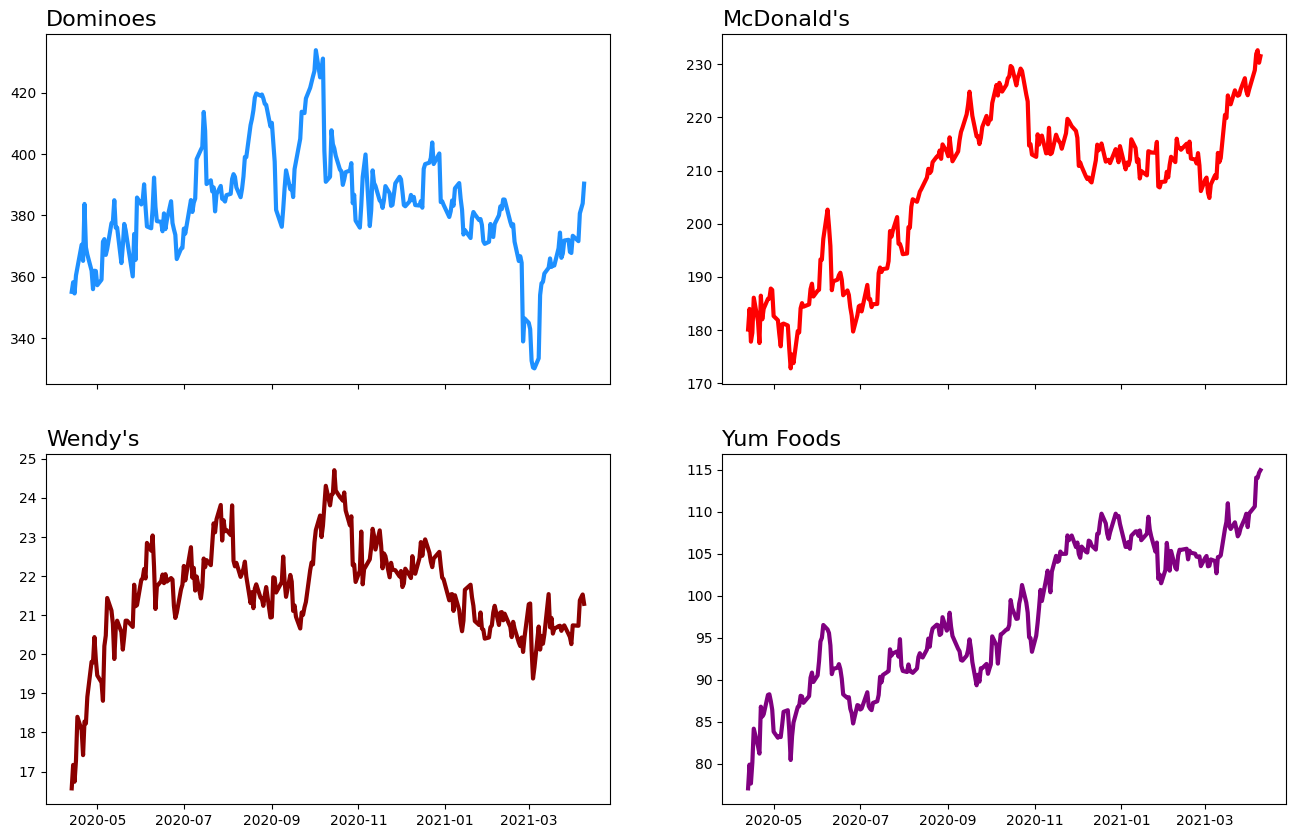

In [118]:
# Create the figure and list of axes.
# We can also set the figsize here.
# Additionally, set sharex=True to keep x-axes aligned
fig, axs = plt.subplots(2, 2, figsize=(16, 10), sharex=True)  #first args determine rows/columns of overall viz

# First determine an axis to operatoe on and then create the plot!
axs[0][0].plot(stocks['Date'], stocks['DPZ'], color='dodgerblue', linewidth=3)
axs[0][0].set_title('Domino\'s', size=16, loc='left')

# We can do this for all the other stocks!
axs[0][1].plot(stocks['Date'], stocks['MCD'], color='red', linewidth=3)
axs[0][1].set_title('McDonald\'s', size=16, loc='left')

axs[1][0].plot(stocks['Date'], stocks['WEN'], color='darkred', linewidth=3)
axs[1][0].set_title('Wendy\'s', size=16, loc='left')

axs[1][1].plot(stocks['Date'], stocks['YUM'], color='purple', linewidth=3)
axs[1][1].set_title('Yum Foods', size=16, loc='left');

---

## More Visualization Libraries in Python

In this lesson, you saw the vanilla matplotlib API and [Seaborn](https://seaborn.pydata.org/) (which uses Matplotlib under the hood). Other Popular Python visualization libraries include the following, which can be used for more advanced plots (like maps) or for interactive plotting:
- [Bokeh](http://bokeh.pydata.org/en/latest/)
- [Altair](https://altair-viz.github.io/)
- [Plotly](https://plot.ly/python/getting-started/)

## Other Visualization Tools

A variety of non-programming tools are also used in industry. However, not all of these are great for repeated analysis, customizable, or free! For example:
- Excel
- Power BI
- Tableau

---

## Matplotlib gallery

See the possibilities of matplotlib [here](https://matplotlib.org/3.2.1/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py).
- These examples are to show what's possible. Don't feel you need to memorize any of them. 

---

## Choosing the Right Chart Type

**If-This-Then-That Guidelines**

### Just a number or two
If showing just one or two numbers, then:
   - simply report the numbers.
   - compare numbers using a bar chart.
   
### One Variable
If visualizing the distribution of one variable, then:
   - If the variable is qualitative, (categorical: nominal or ordinal): use a bar chart.
   - If the variable is quantitative (numeric: ratio or interval): use a histogram.
    
### Two Variables
If visualizing the relationship between two variables, then:
   - If both variables are quantitative, then:
       - If one variable is time, then use a line plot.
       - Otherwise, use a scatter plot - or a box plot if want to show stats.
   - If one variable is quantitative and another is qualitative, then use multiple histograms.
   - If both variables are qualitative, then:
       - Use a table or a heat map.

### Three+ Variables
- Use a heat map, box plot, or multiple scatter plots

That should cover 95%+ of cases you'll see. 😀


### Avoid...
- Pie Charts
- 3-D Charts